In [ ]:
# this project explore color scheme of my most recent 50 photos. I am associating this data with the map.geojson if the locations that these photos are taken. In the final product,  I hope to find a correlation between the primary color scheme of different areas I tend to take pictures of.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import os
import pandas as pd

In [3]:
def extract_colors(image, num_colors=10):
    # Reshape the image to be a list of pixels
    pixels = image.reshape((-1, 3))

    # Use KMeans to cluster pixels
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Count each label to find most popular colors
    label_counts = Counter(labels)

    # Get colors and sort by popularity
    sorted_colors = [(colors[label], count) for label, count in label_counts.items()]
    sorted_colors.sort(key=lambda x: x[1], reverse=True)
    
    return sorted_colors

def plot_colors(colors, save_path):
    # Create a square figure
    square = np.zeros((100, 100 * len(colors), 3), dtype='uint8')

    start = 0
    for idx, (color, count) in enumerate(colors):
        end = start + 100
        square[:, start:end, :] = color
        start = end

    plt.figure(figsize=(12, 6))
    plt.axis('off')
    plt.imshow(square)
    plt.savefig(save_path)
    plt.close()

In [4]:
def process_images(folder_path, num_colors=10):
    color_data = []

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Extract and sort colors
            colors = extract_colors(image, num_colors)
            
            # Create and save colorbar
            colorbar_path = os.path.join(folder_path, f"colorbar_{filename}")
            plot_colors(colors, colorbar_path)
            
            # Collect data for the dataframe
            color_info = {"Image": filename}
            total_count = sum(count for _, count in colors)
            for i, (color, count) in enumerate(colors):
                percentage = (count / total_count) * 100
                color_info[f"Color_{i+1}"] = color
                color_info[f"Percentage_{i+1}"] = percentage
            color_data.append(color_info)

    df = pd.DataFrame(color_data)
    return df

In [5]:
if __name__ == "__main__":
    folder_path = "photos"
    num_colors = 10
    df = process_images(folder_path, num_colors)
    df.to_csv(os.path.join(folder_path, "color_data.csv"), index=False)
    print("Color data saved to color_data.csv")
    print(df)

Color data saved to color_data.csv
                                             Image  \
0             9164be3778c76111132e4c202cf76991.jpg   
1    colorbar_9164be3778c76111132e4c202cf76991.jpg   
2                           colorbar_IMG_1070.JPEG   
3                           colorbar_IMG_1071.JPEG   
4                           colorbar_IMG_1072.JPEG   
..                                             ...   
101                                  IMG_1226.JPEG   
102                                   IMG_1237.JPG   
103                                  IMG_9099.JPEG   
104                                  IMG_9307.JPEG   
105                                  IMG_9313.JPEG   

                                               Color_1  Percentage_1  \
0    [178.56404061083686, 199.28379053835357, 198.3...     27.427759   
1    [254.97288474873454, 254.9934934745255, 254.97...     88.116667   
2    [254.99065150981718, 254.98985867718048, 254.9...     88.115694   
3    [254.99496401513454, 25

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import pandas as pd
import numpy as np

csv_data = pd.read_csv("./photos/color_data.csv")
geojson_data = gpd.read_file("./map.geojson")

In [2]:
geojson_data.head()

,geometry
0,POINT (-73.94298 40.74837)
1,POINT (-73.96169 40.80773)
2,POINT (-73.96095 40.80827)
3,POINT (-73.96142 40.80771)
4,POINT (-73.95775 40.81166)


In [3]:
csv_data.head()

,Image,Color_1,Percentage_1,Color_2,Percentage_2,Color_3,Percentage_3,Color_4,Percentage_4,Color_5,...,Color_6,Percentage_6,Color_7,Percentage_7,Color_8,Percentage_8,Color_9,Percentage_9,Color_10,Percentage_10
0,9164be3778c76111132e4c202cf76991.jpg,[178.56404061 199.28379054 198.32652775],27.427759,[187.62797193 208.53774225 206.68111033],21.395626,[168.45151337 189.0416429 188.1968906 ],16.263542,[155.44194904 175.47058059 174.06398696],14.883684,[14.1938331 17.5245851 16.7009838],...,[126.5597198 142.99715714 137.87247365],2.687692,[48.619922 60.77092555 74.18874702],2.212713,[ 89.08700673 112.23769192 98.99022552],2.190348,[169.86159178 165.62700349 87.97883588],1.312770,[138.60952658 61.18644526 41.30560552],0.788795
1,colorbar_9164be3778c76111132e4c202cf76991.jpg,[254.97288475 254.99349347 254.97247651],88.116667,[183.47436955 202.91138346 202.05903842],2.357222,[169.56356322 188.90655172 188.06977011],1.208333,[ 90.55433513 111.84423931 98.89401729],1.188611,[126.114072 142.69693782 137.10939691],...,[14.79534829 17.07386629 16.13966807],1.188333,[48.164446 59.9745208 73.68057504],1.188333,[137.45850865 61.09969612 42.80189341],1.188333,[168.21578025 164.70520164 87.32893045],1.188194,[155.41749503 174.76341948 173.96000468],1.187639
2,colorbar_IMG_1070.JPEG,[254.99065151 254.98985868 254.93074142],88.115694,[216.94584331 212.69901268 200.26318864],2.377500,[141.82114106 116.05296932 91.40625365],1.190417,[165.08062631 163.92393082 161.76559944],1.188611,[18.83286583 14.97545582 15.957223 ],...,[68.67893876 56.89095372 45.03529687],1.188333,[194.29569892 150.07713885 121.40486209],1.188333,[101.66721216 85.89853887 73.34891876],1.188194,[183.93150205 210.07036821 100.75429573],1.188194,[121.45879185 162.6875439 26.57890424],1.186389
3,colorbar_IMG_1071.JPEG,[254.99496402 254.99115905 254.93186052],88.115833,[221.40983702 216.10759974 206.04754951],2.377639,[136.7823447 124.21625409 115.04764129],1.189444,[88.18137198 78.147131 76.00934907],1.188472,[23.01192146 17.0341281 16.85530622],...,[183.49175921 157.04301578 149.74891876],1.188194,[215.82957335 209.83343074 99.41624781],1.188194,[64.7808043 55.21311667 43.05962123],1.188056,[174.60614917 154.98982932 59.1524433 ],1.188056,[128.44632834 103.15423293 52.56957437],1.187778
4,colorbar_IMG_1072.JPEG,[254.75746288 254.75382826 254.63575341],89.303056,[207.55315673 200.17049831 188.9550706 ],1.190139,[68.06106959 58.72851471 54.12459131],1.189444,[173.81602617 164.93540474 150.04578904],1.189028,[145.68497312 130.03704136 114.34949755],...,[108.98889668 94.98550725 86.20652174],1.188333,[25.28050491 16.24731183 16.5982936 ],1.188333,[189.80675707 69.32101941 48.93652093],1.188056,[217.39546305 149.17235734 92.65423293],1.187778,[90.1517314 32.19501638 28.1758306 ],1.187222


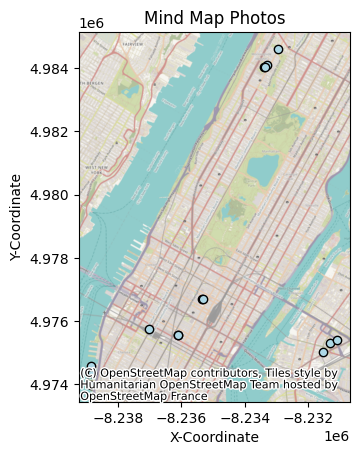

In [14]:
import contextily as ctx

geojson_data = geojson_data.to_crs(epsg=3857)

# Plot GeoJSON data
fig, ax = plt.subplots()
geojson_data.plot(ax=ax, color='lightblue', edgecolor='black')

# Add basemap
ctx.add_basemap(ax, crs=geojson_data.crs.to_string())

plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.title('Mind Map Photos')

plt.show()